In [1]:
#!pip install prophet
import pandas as pd
from prophet import Prophet

In [3]:
df=pd.read_excel(r'/Users/radhikagarg/Desktop/TP TERM 3/TP/data/Bitcoin.xlsx',sheet_name='bitcoin_2018')
df.head()

,ds,y
0,2018-01-01,13444.9
1,2018-01-02,14754.1
2,2018-01-03,15156.6
3,2018-01-04,15180.1
4,2018-01-05,16954.8


In [4]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=365*2)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1886,2023-03-02,186394.837977,34657.343806,346876.562010
1887,2023-03-03,186525.692554,33645.758665,346695.630952
1888,2023-03-04,186620.909071,34861.087398,347660.172665
1889,2023-03-05,186634.683284,34470.636291,349279.972112
1890,2023-03-06,186756.280812,33349.305969,347494.578111


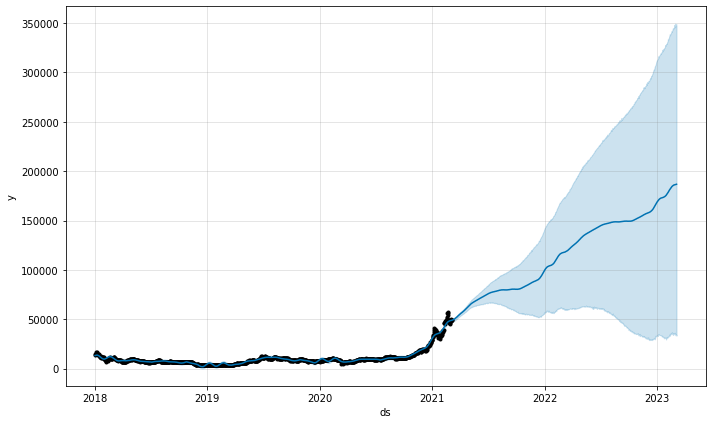

In [10]:
fig1 = m.plot(forecast)

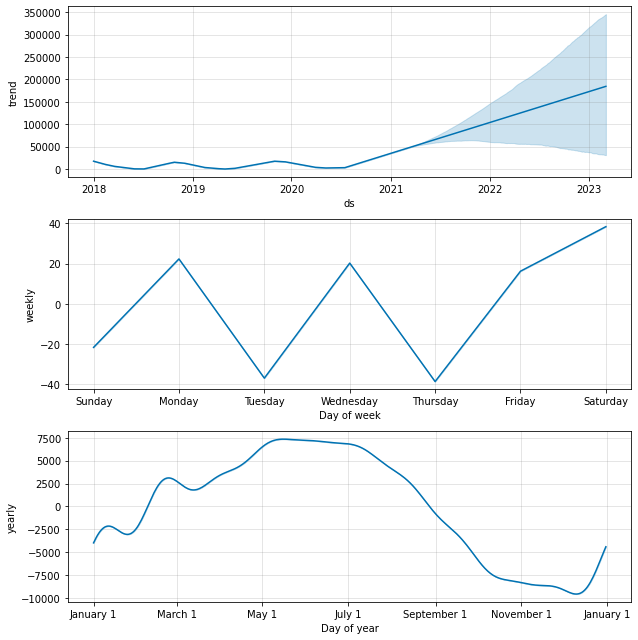

In [11]:
fig2 = m.plot_components(forecast)

In [30]:
#!pip install plotly==4.0

In [12]:
from prophet.plot import plot_plotly, plot_components_plotly
#!pip install ipywidgets
plot_plotly(m, forecast)

In [13]:
plot_components_plotly(m, forecast)

In [18]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
1886,2023-03-02,186394.837977,NaN
1887,2023-03-03,186525.692554,NaN
1888,2023-03-04,186620.909071,NaN
1889,2023-03-05,186634.683284,NaN
1890,2023-03-06,186756.280812,NaN


In [19]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
1156,2021-03-02,48579.797022,48424.2
1157,2021-03-03,48711.045222,50395.1
1158,2021-03-04,48725.216080,48428.0
1159,2021-03-05,48855.285736,48792.5
1160,2021-03-06,48958.258701,48855.6


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score(metric_df.y, metric_df.yhat)

0.9770860477643126

In [21]:
mean_squared_error(metric_df.y, metric_df.yhat)

1632886.637079562

In [22]:
mean_absolute_error(metric_df.y, metric_df.yhat)

858.9764102096584